## Loading Dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy
import os
import sklearn
from mlxtend.frequent_patterns import apriori, association_rules

# Loading the original dataset

In [2]:
# In this notebook we have used the entries from the US region only for the to download the original dataset click - https://www.gemconsortium.org/data/sets?id=aps
current_dir = os.getcwd()
parent = os.path.join(current_dir, os.pardir)
filepath = os.path.join(parent, 'data' , 'GEM_Individual.sav')
data, meta = pyreadstat.read_sav(filepath, encoding='iso-8859-1')

In [3]:
df=pd.DataFrame(data)
df

,country,ctryalp,REGION,WEFInc,WEFIncREV,yrsurv,setid,ID,weight,WEIGHT_L,...,TEAEXPST,TEAEXPWK,IPACT_ALL,IPACT_EMP,IPACTNOW_ALL,IPACTNOW_EMP,IPACTLD_ALL,IPACTLD_EMP,IPACTLDNOW_ALL,IPACTLDNOW_EMP
0,1.0,US,5.0,4.0,3.0,2018.0,1.180010e+09,10001.0,1.237650,1.227517,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,US,5.0,4.0,3.0,2018.0,1.180010e+09,10002.0,1.237650,1.227517,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,US,5.0,4.0,3.0,2018.0,1.180010e+09,10003.0,1.237650,1.227517,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,US,5.0,4.0,3.0,2018.0,1.180010e+09,10004.0,0.866064,0.858973,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,US,5.0,4.0,3.0,2018.0,1.180010e+09,10005.0,0.866064,0.858973,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162072,974.0,QA,2.0,4.0,3.0,2018.0,9.741801e+11,121025.0,0.834000,0.836022,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
162073,974.0,QA,2.0,4.0,3.0,2018.0,9.741801e+11,121104.0,1.050000,1.052545,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162074,974.0,QA,2.0,4.0,3.0,2018.0,9.741801e+11,121115.0,0.960000,0.962327,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162075,974.0,QA,2.0,4.0,3.0,2018.0,9.741801e+11,121146.0,0.834000,0.836022,...,NaN,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


# Using only US citizens

In [4]:
listus = df[df['country']==1.0]
df_us=pd.DataFrame(listus)

Converting to csv to open in readable format

In [5]:
df_us.to_csv(os.path.join(parent, 'data','gem_us_individual.csv'), index=False)

In [6]:
df_us

,country,ctryalp,REGION,WEFInc,WEFIncREV,yrsurv,setid,ID,weight,WEIGHT_L,...,TEAEXPST,TEAEXPWK,IPACT_ALL,IPACT_EMP,IPACTNOW_ALL,IPACTNOW_EMP,IPACTLD_ALL,IPACTLD_EMP,IPACTLDNOW_ALL,IPACTLDNOW_EMP
0,1.0,US,5.0,4.0,3.0,2018.0,1.180010e+09,10001.0,1.237650,1.227517,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,US,5.0,4.0,3.0,2018.0,1.180010e+09,10002.0,1.237650,1.227517,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,US,5.0,4.0,3.0,2018.0,1.180010e+09,10003.0,1.237650,1.227517,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,US,5.0,4.0,3.0,2018.0,1.180010e+09,10004.0,0.866064,0.858973,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,US,5.0,4.0,3.0,2018.0,1.180010e+09,10005.0,0.866064,0.858973,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,1.0,US,5.0,4.0,3.0,2018.0,1.182081e+09,2081312.0,0.581597,0.576835,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3008,1.0,US,5.0,4.0,3.0,2018.0,1.182081e+09,2081343.0,1.027169,1.018759,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3009,1.0,US,5.0,4.0,3.0,2018.0,1.182081e+09,2081363.0,1.027169,1.018759,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3010,1.0,US,5.0,4.0,3.0,2018.0,1.182081e+09,2081365.0,1.027169,1.018759,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [7]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3012 entries, 0 to 3011
Columns: 281 entries, country to IPACTLDNOW_EMP
dtypes: float64(257), object(24)
memory usage: 6.5+ MB


ultimately want to check for TEA (Total Entrepreunial Activity) in a respondent

In [8]:
TEA_cols = [col for col in df_us.columns if 'TEA' in col]
print(TEA_cols)

print(len(TEA_cols))



['TEA18', 'TEA18MAL', 'TEA18FEM', 'TEA18MOP', 'TEA18FOP', 'TEA18MNE', 'TEA18FNE', 'TEA18STA', 'TEA18OPP', 'TEA18NEC', 'TEA18OTH', 'TEA18MOT', 'TEA18IDO', 'TEA18MIX', 'TEA18WHY', 'TEAOPTYP', 'TEAMOTIV', 'TEAISIC4_4D', 'TEASIC4C', 'TEAISIC4_1D', 'TEA18MEM', 'TEACUST', 'TEACOMP', 'TEATECH', 'TEA18NTC', 'TEAHITEC', 'TEA18TEC', 'TEA18NPM', 'TEA18JNW', 'TEA18J5Y', 'TEAJOBGR', 'TEAJOBGP', 'TEA18JOB', 'TEAOWNER', 'TEA18EMP', 'TEA18HJG', 'TEAEXP4C', 'TEANEC_P', 'TEAOPP_P', 'TEAJOBEX', 'TEANEWPR', 'TEANEWMK', 'TEAEXPST', 'TEAEXPWK']
44


which TEA to use as dependent variable?????

In [9]:
most_filled_tea_col = df.filter(regex='TEA').count().idxmax()
most_filled_tea_col

'TEA18'

In [10]:
df_us['TEA18'].describe()

count    3012.000000
mean        0.144422
std         0.351576
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TEA18, dtype: float64

In [11]:
null_count =0
for val in df_us['TEA18'] :
    if pd.isnull(val):
        null_count += 1;
 
print(null_count)

0


TEA18 has no null values and takes binary values only, most suited for judging Total Entrepreunial Activity..

## Columns Of Interest
{suskill,knowent,opport,fearfail,hhsize,gender,GEMHHINC,age,UNEDUC,discent,busang,ESTBBUSO,nbgoodcq,easystart,nbstatus,nboscent,nbmedia}

In [12]:
keep_col=['TEA18','suskill','knowent','opport','fearfail','hhsize','gender','GEMHHINC','age','UNEDUC','discent','busang','ESTBBUSO','easystart','nbstatus','nbmedia']
dfus_new=df_us[keep_col]

dfus_new

,TEA18,suskill,knowent,opport,fearfail,hhsize,gender,GEMHHINC,age,UNEDUC,discent,busang,ESTBBUSO,easystart,nbstatus,nbmedia
0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,3467.0,21.0,4.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,0.0,0.0,NaN,1.0,3.0,1.0,NaN,20.0,3.0,NaN,NaN,0.0,NaN,NaN,NaN
2,0.0,0.0,NaN,0.0,1.0,1.0,1.0,33.0,22.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,3.0,1.0,68100.0,25.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,NaN,0.0,NaN,0.0,5.0,1.0,3467.0,31.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,0.0,1.0,1.0,1.0,0.0,2.0,2.0,68100.0,50.0,6.0,0.0,0.0,1.0,0.0,0.0,1.0
3008,0.0,1.0,0.0,1.0,1.0,4.0,1.0,68100.0,24.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0
3009,1.0,1.0,1.0,0.0,0.0,3.0,1.0,68100.0,22.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0
3010,1.0,1.0,1.0,1.0,0.0,1.0,1.0,68100.0,21.0,6.0,1.0,0.0,0.0,1.0,1.0,0.0


In [13]:
for_heatmap = df_us[keep_col]

### checking if the selected columns contain only binary values

In [14]:
for col in keep_col:
    unique_values = df[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in TEA18: [1. 0.]
Unique values in suskill: [ 1.  0. nan]
Unique values in knowent: [ 1.  0. nan]
Unique values in opport: [ 1. nan  0.]
Unique values in fearfail: [nan  1.  0.]
Unique values in hhsize: [ 1.  3.  5.  2.  4.  7.  6.  8. 10.  9. 29. nan 11. 15. 12. 17. 13. 16.
 18. 30. 28. 24. 14. 25. 34. 21. 58. 20. 22. 19. 40. 38. 43. 35. 53. 23.
 45. 46. 27. 55. 80. 54.]
Unique values in gender: [1. 2.]
Unique values in GEMHHINC: [3.467e+03       nan 3.300e+01 6.810e+04]
Unique values in age: [21. 20. 22. 25. 31. 30. 26. 34. 36. 35. 53. 45. 48. 47. 46. 52. 57. 60.
 59. 68. 67. 19. 27. 29. 33. 44. 40. 54. 64. 55. 65. 66. 24. 32. 42. 41.
 37. 38. 43. 51. 62. 61. 73. 23. 28. 39. 56. 69. 18. 49. 70. 58. 63. 74.
 71. 72. nan 50. 93. 78. 85. 76. 77. 88. 90. 84. 75. 80. 86. 92. 94. 82.
 79. 91. 81. 83. 95. 89. 87. 96. 99.]
Unique values in UNEDUC: [ 4.  3.  6.  7.  2.  0. nan  5.  1.  8.]
Unique values in discent: [ 0. nan  1.]
Unique values in busang: [ 0. nan  1.]
Unique valu

- need to remove nan &
- hhsize, GEMHHINC,age, UNEDUC(not necessarily) needs to be discretized

In [15]:
null_counts=dfus_new.isnull().sum()
print(null_counts/3012*100)

TEA18         0.000000
suskill       6.772908
knowent       1.660027
opport       20.152722
fearfail      5.013280
hhsize        1.726428
gender        0.000000
GEMHHINC     13.346614
age           2.357238
UNEDUC        1.361222
discent       0.431607
busang        0.398406
ESTBBUSO      0.000000
easystart     8.665339
nbstatus      6.009296
nbmedia       3.950863
dtype: float64


suskill, knowent, fearfail, hhsize, age, UNEDUC, discent, busang, easystart, nbstatus, nbmedia have less than 10% null values so we fill it with their mode. 

filling all na values with its mode for now..

In [16]:
na_modecol = []
for col in dfus_new.columns:
    mode_val = dfus_new[col].mode()[0]
    dfus_new.loc[dfus_new[col].isna(),col]=mode_val

In [17]:
null_countnow=dfus_new.isnull().sum()
print(null_countnow)

TEA18        0
suskill      0
knowent      0
opport       0
fearfail     0
hhsize       0
gender       0
GEMHHINC     0
age          0
UNEDUC       0
discent      0
busang       0
ESTBBUSO     0
easystart    0
nbstatus     0
nbmedia      0
dtype: int64


# EDA

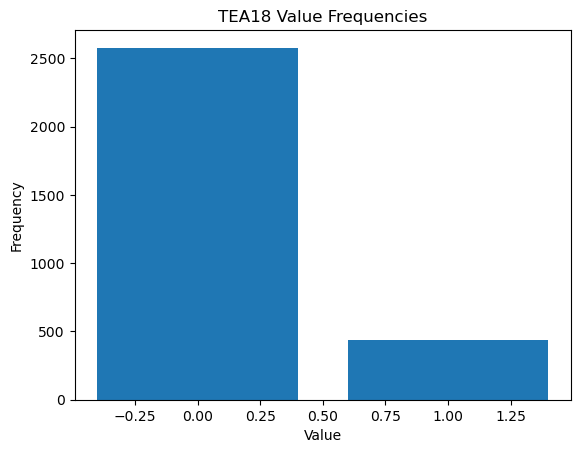

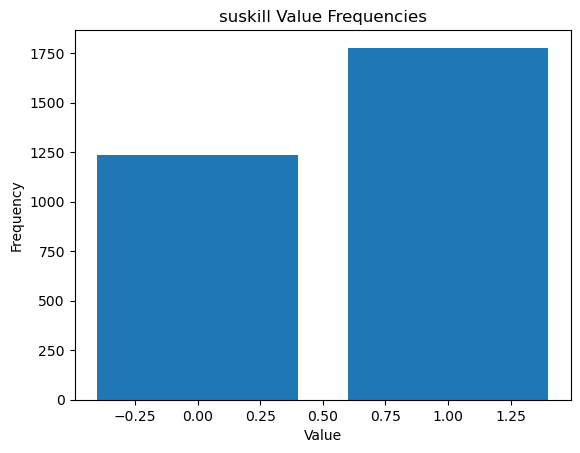

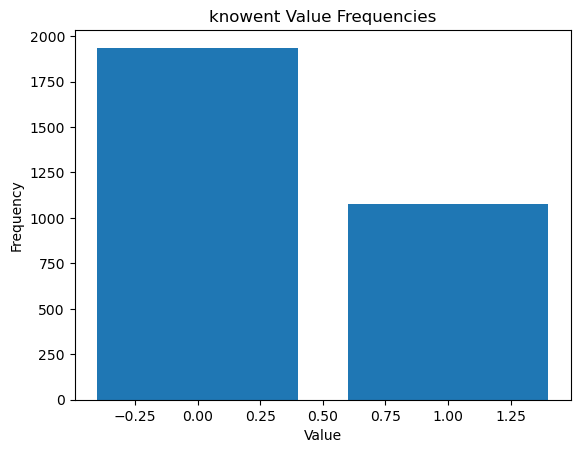

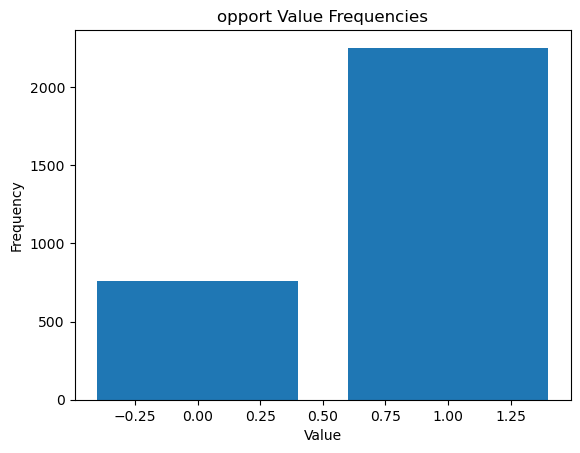

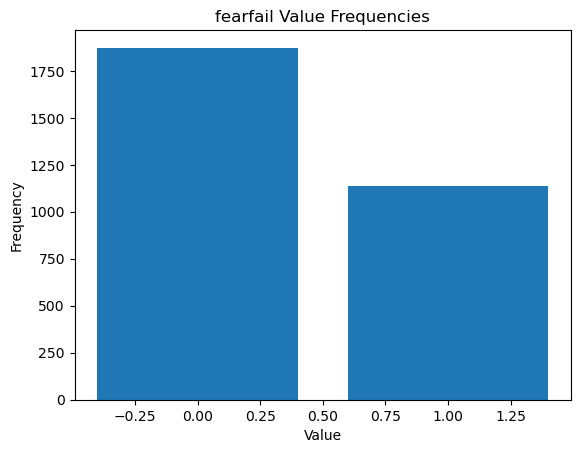

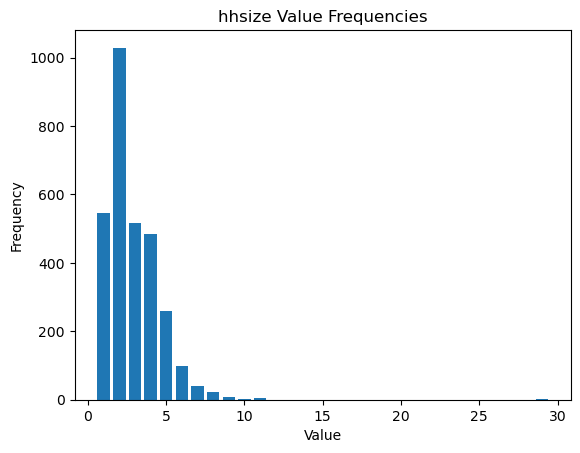

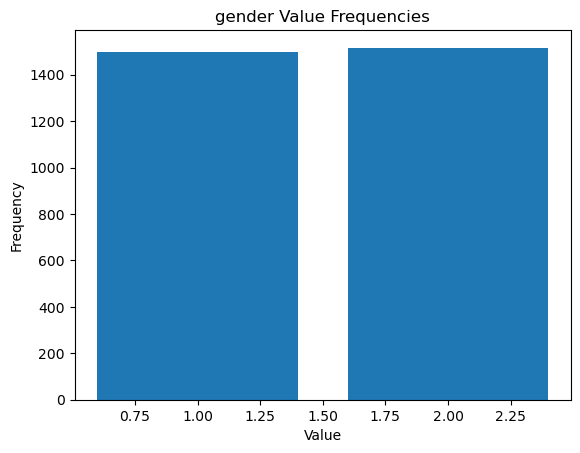

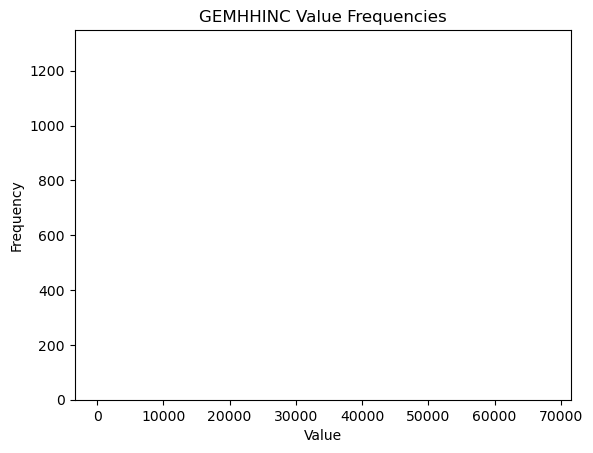

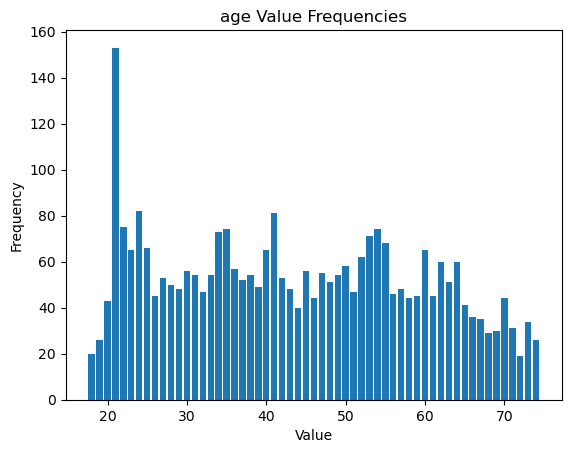

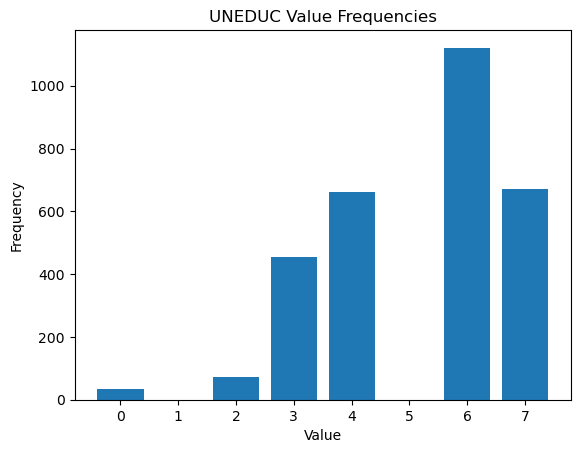

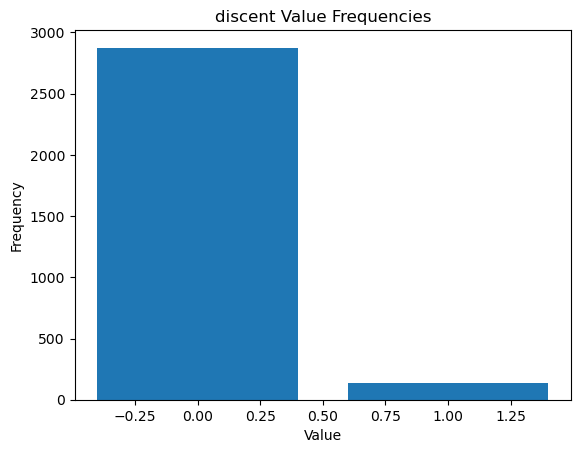

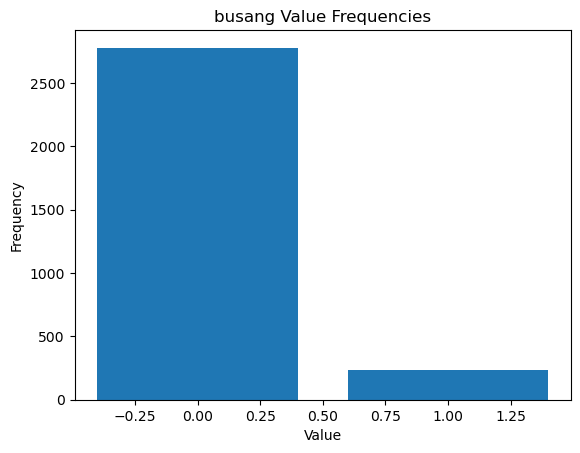

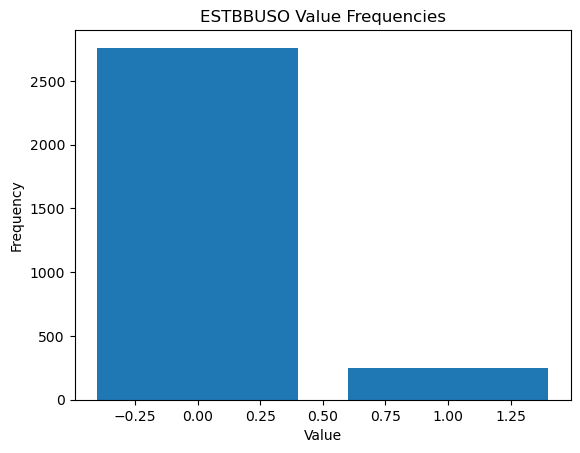

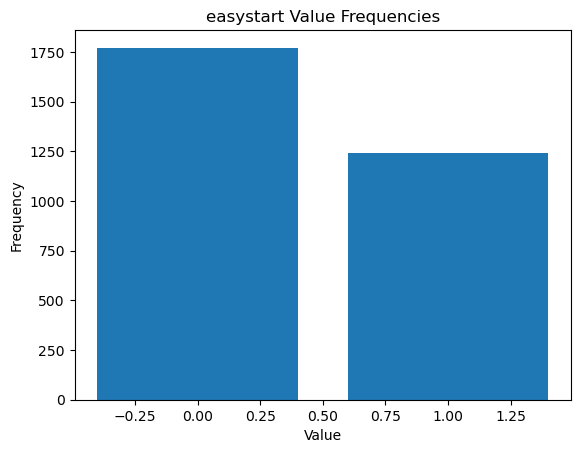

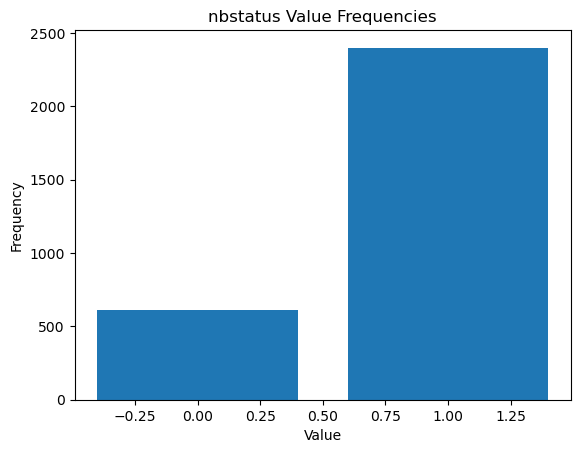

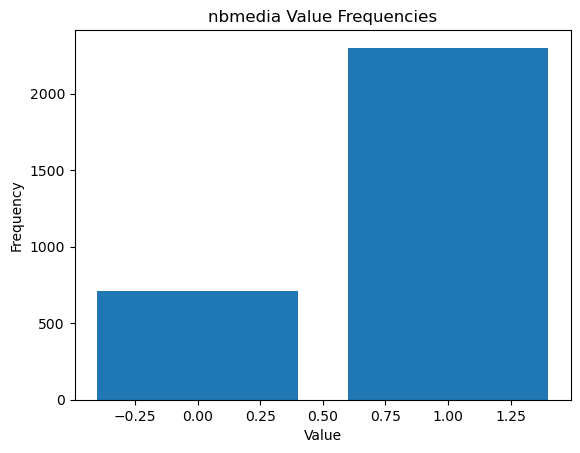

In [18]:
# Plot the frequency of each value

for col in keep_col:
    value_counts = dfus_new[col].value_counts()
    plt.figure()
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f"{col} Value Frequencies")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

In [19]:
unique_list=[]
for i in df_us['TEA18']:
    if i not in unique_list:
        unique_list.append(i)

print(unique_list)

[1.0, 0.0]


In [20]:
freq_dict={}
for val in unique_list:
    freq_dict[val]=len(df_us[df_us['TEA18']==val])

print(freq_dict)

{1.0: 435, 0.0: 2577}


#### % of entrepreneurs in US :

In [21]:
total_count = 0
for value in freq_dict.values():
    total_count += value
perc = freq_dict.get(1)/total_count
print(perc*100)

14.442231075697212


now to discretise hhsize, GEMHHINC,age, UNEDUC(not necessarily)

In [22]:
dfus_new['age'].min()

18.0

In [23]:
dfus_new['age'].max()

74.0

In [24]:
dfus_new['age'].mean()

43.614873837981406

In [25]:
thresholds = [35,60,101]
age_discrete=[]
for val in dfus_new['age']:
    if val< thresholds[0]:
        age_discrete.append(0)
    elif val < thresholds[1]:
        age_discrete.append(1)
    else :
        age_discrete.append(2)

dfus_new['age_discrete']= age_discrete


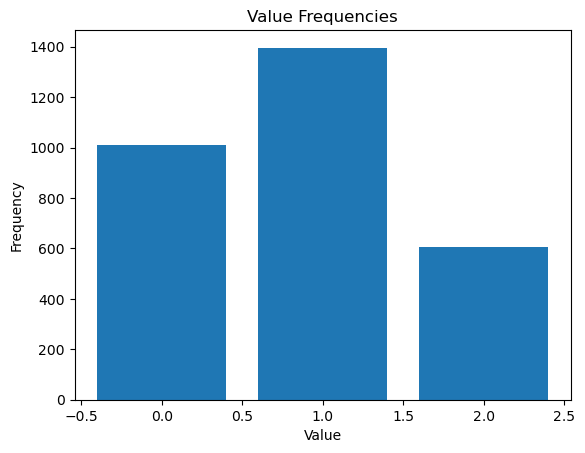

In [26]:
value_counts = dfus_new['age_discrete'].value_counts()
plt.figure()
plt.bar(value_counts.index, value_counts.values)
plt.title('Value Frequencies')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()   

In [27]:
dfus_new=dfus_new.drop('age',axis=1)

need binary values only !

binary values for **gender**

In [28]:
dfus_new.loc[dfus_new['gender']==2,'gender']=0


females will be represented by 0

binary values for **age**

In [29]:
dummies_age = pd.get_dummies(dfus_new['age_discrete'],prefix='age')
print(dummies_age)

      age_0  age_1  age_2
0      True  False  False
1      True  False  False
2      True  False  False
3      True  False  False
4      True  False  False
...     ...    ...    ...
3007  False   True  False
3008   True  False  False
3009   True  False  False
3010   True  False  False
3011   True  False  False

[3012 rows x 3 columns]


In [30]:
dfus_new=pd.concat([dfus_new,dummies_age],axis=1)

In [31]:
dfus_new = dfus_new.rename(columns={'age_0': 'young', 'age_1': 'adult', 'age_2': 'old'})

In [32]:
dfus_new=dfus_new.drop('age_discrete',axis=1)

binary values for **hhsize** (household size)

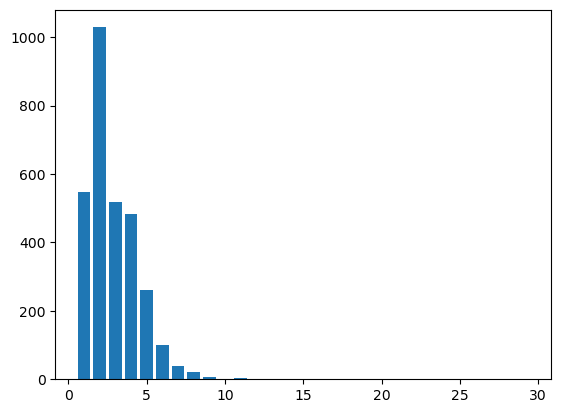

In [33]:
value_counts = dfus_new['hhsize'].value_counts()
plt.figure()
plt.bar(value_counts.index, value_counts.values)
plt.show()

In [34]:
dfus_new['small_hhsize'] = dfus_new['hhsize'].apply(lambda x: 1 if x <= 2 else 0)
dfus_new['normal_hhsize'] = dfus_new['hhsize'].apply(lambda x: 1 if x > 2 and x < 5 else 0)
dfus_new['large_hhsize'] = dfus_new['hhsize'].apply(lambda x: 1 if x >= 5 else 0)

In [35]:
dfus_new=dfus_new.drop('hhsize',axis=1)

binary values for **UNEDUC** (educational attainment)

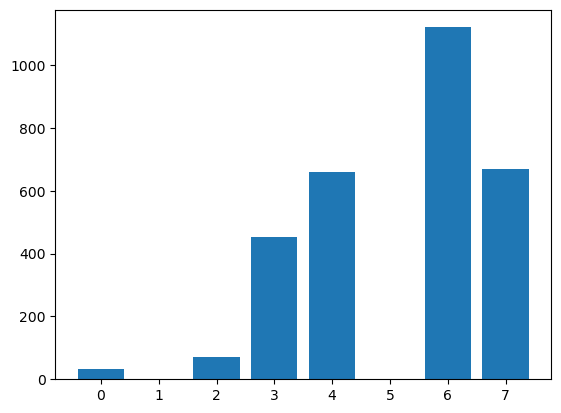

In [36]:
value_counts = dfus_new['UNEDUC'].value_counts()
plt.figure()
plt.bar(value_counts.index, value_counts.values)
plt.show()

In [37]:
dfus_new['primary_educ'] = dfus_new['UNEDUC'].apply(lambda x: 1 if x <= 1 else 0)
dfus_new['secondary_educ'] = dfus_new['UNEDUC'].apply(lambda x: 1 if x > 1 and x <= 4 else 0)
dfus_new['tert_educ'] = dfus_new['UNEDUC'].apply(lambda x: 1 if x >= 5 else 0)

In [38]:
dfus_new=dfus_new.drop('UNEDUC',axis=1)

binary values for **GEMHHINC** (household income)

In [39]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

income_col= dfus_new['GEMHHINC'].values.reshape(-1,1)
income_discretized = discretizer.fit_transform(income_col)

dfus_new['lower_income'] = (income_discretized == 0).astype(int)
dfus_new['middle_income'] = (income_discretized == 1).astype(int)
dfus_new['upper_income'] = (income_discretized == 2).astype(int)




In [40]:
dfus_new=dfus_new.drop('GEMHHINC',axis=1)

In [41]:
dfus_new

,TEA18,suskill,knowent,opport,fearfail,gender,discent,busang,ESTBBUSO,easystart,...,old,small_hhsize,normal_hhsize,large_hhsize,primary_educ,secondary_educ,tert_educ,lower_income,middle_income,upper_income
0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,False,1,0,0,0,1,0,0,1,0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,False,0,1,0,0,1,0,0,1,0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,False,1,0,0,0,0,1,1,0,0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,0,1,0,0,0,1,0,1,0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,1,0,0,0,0,1,0,1,0
3008,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,False,0,1,0,0,0,1,0,1,0
3009,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,False,0,1,0,0,0,1,0,1,0
3010,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,False,1,0,0,0,0,1,0,1,0


<AxesSubplot:>

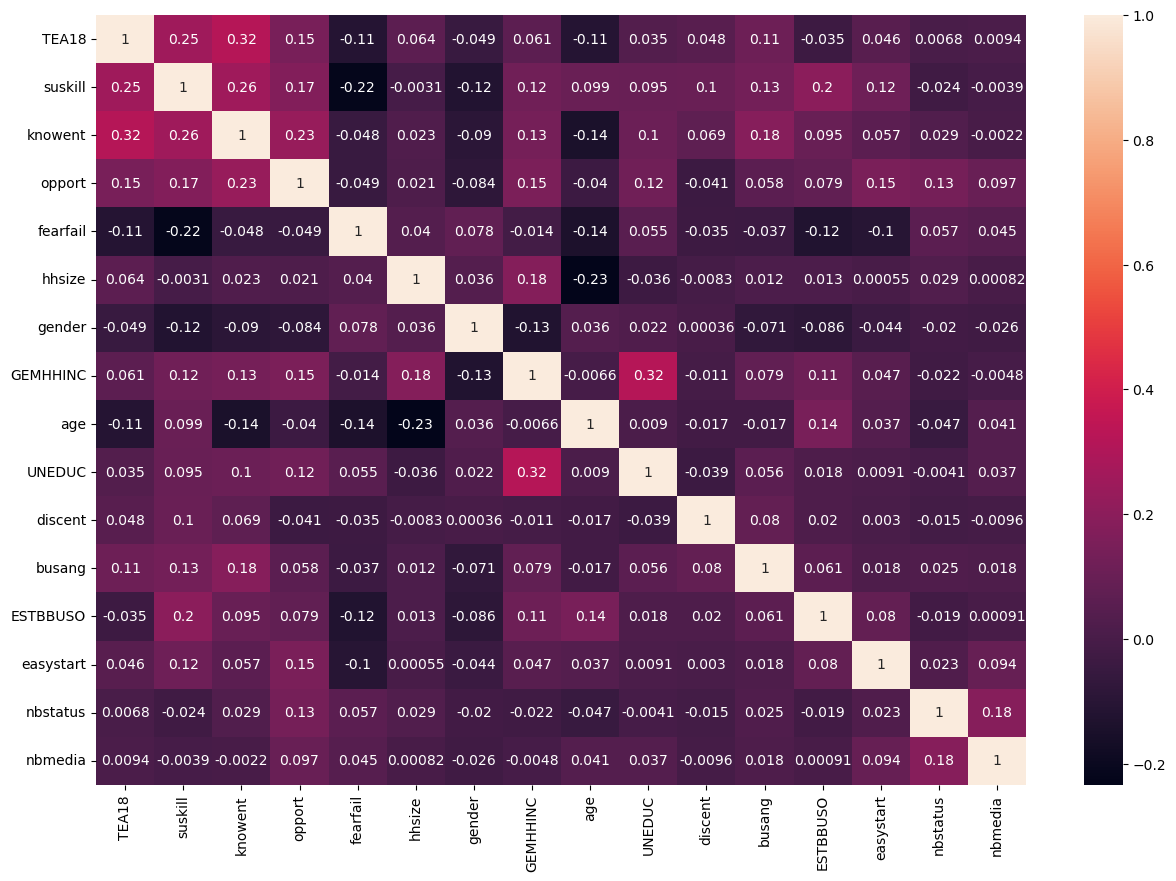

In [42]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.heatmap(for_heatmap.corr(), annot = True)

In [43]:
final_cols=dfus_new.columns
print(final_cols)

Index(['TEA18', 'suskill', 'knowent', 'opport', 'fearfail', 'gender',
       'discent', 'busang', 'ESTBBUSO', 'easystart', 'nbstatus', 'nbmedia',
       'young', 'adult', 'old', 'small_hhsize', 'normal_hhsize',
       'large_hhsize', 'primary_educ', 'secondary_educ', 'tert_educ',
       'lower_income', 'middle_income', 'upper_income'],
      dtype='object')


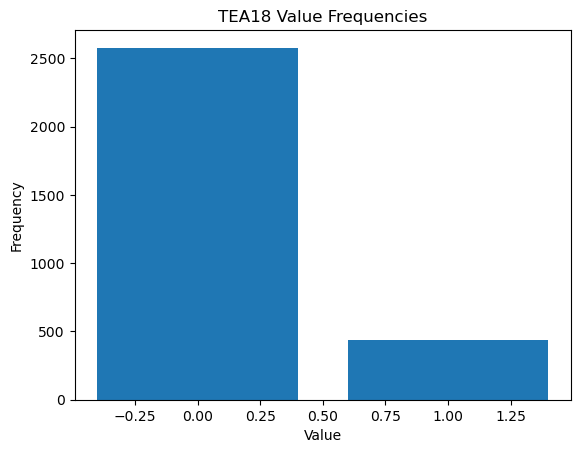

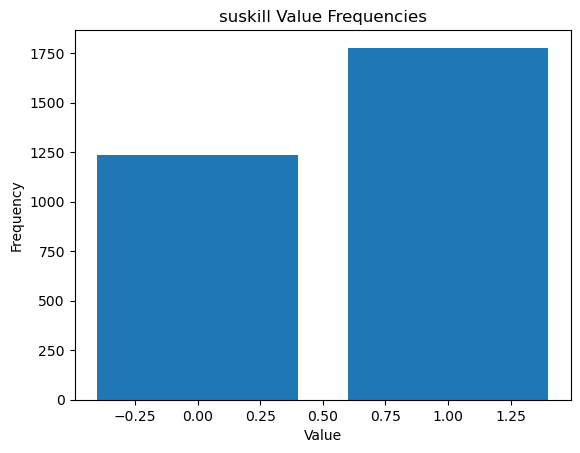

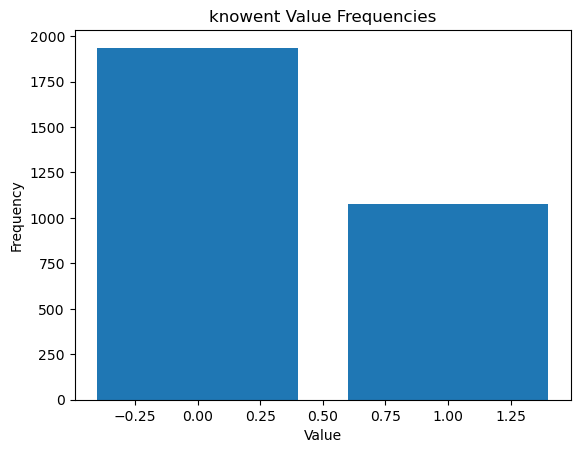

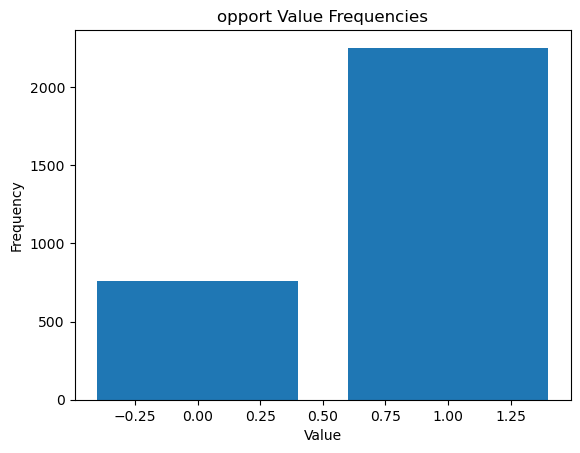

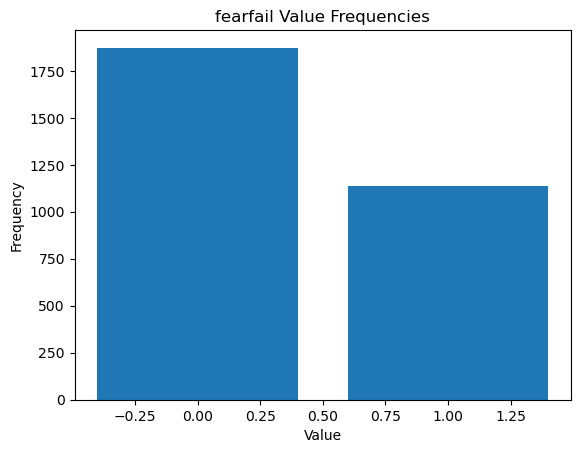

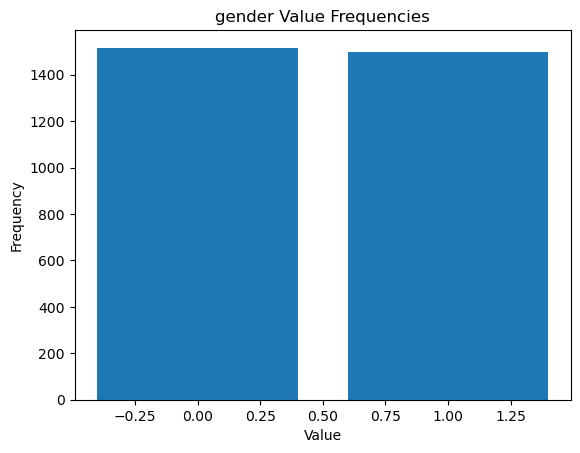

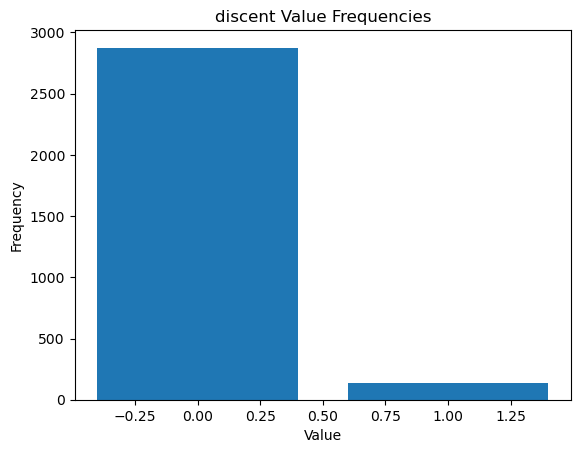

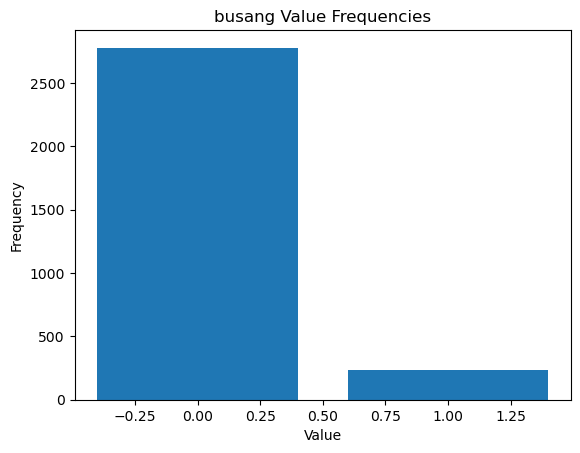

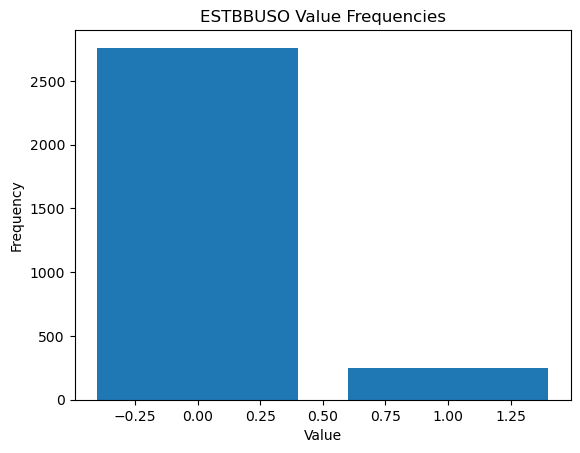

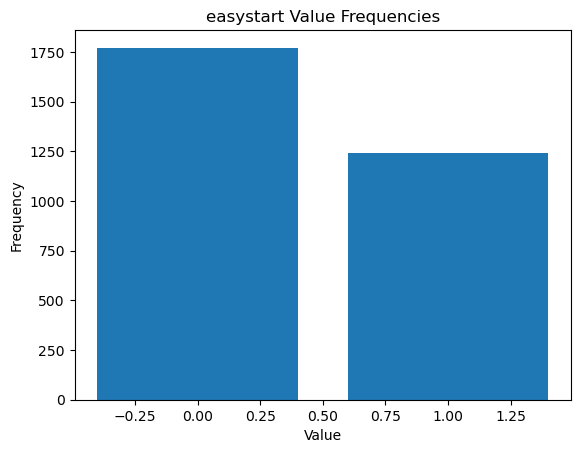

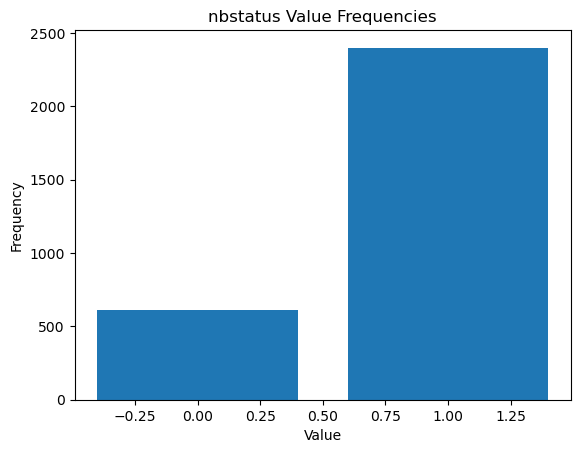

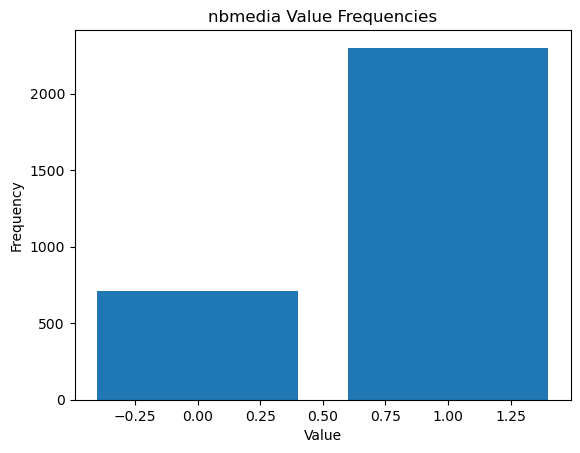

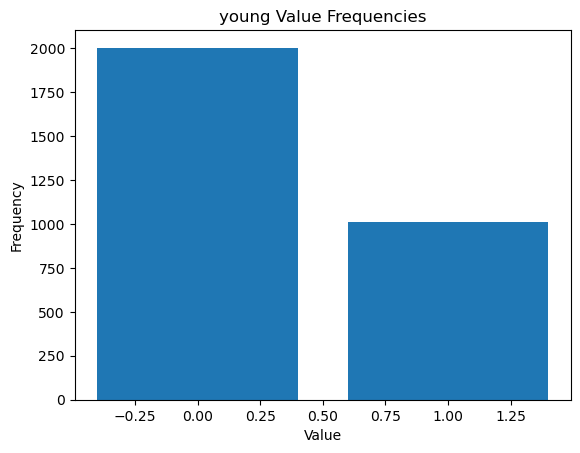

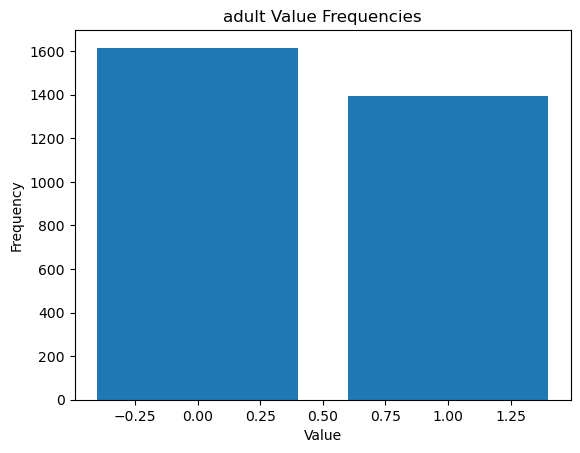

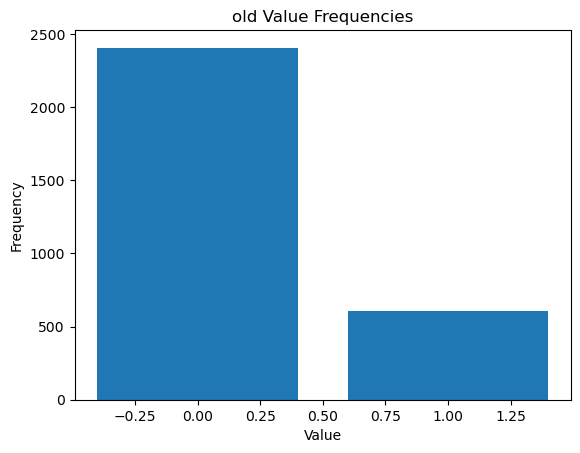

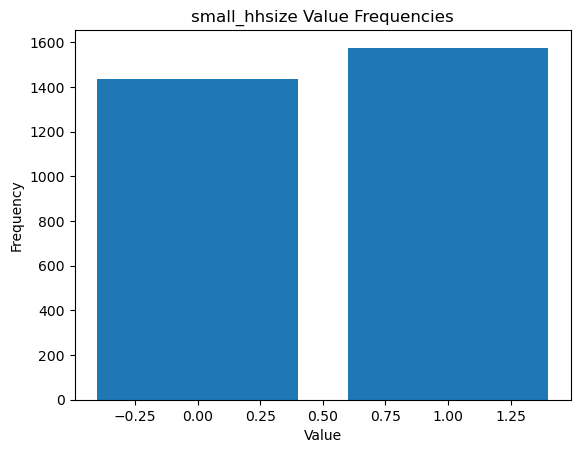

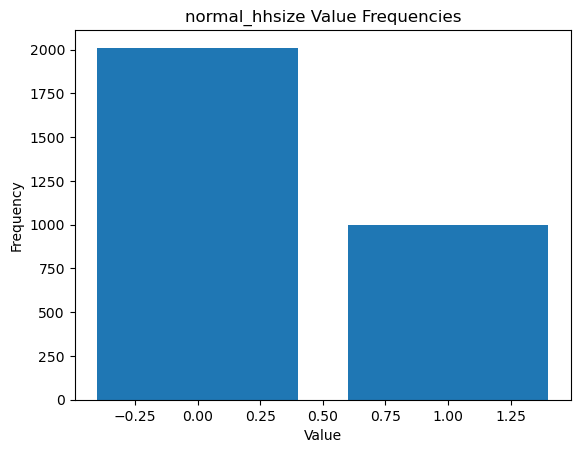

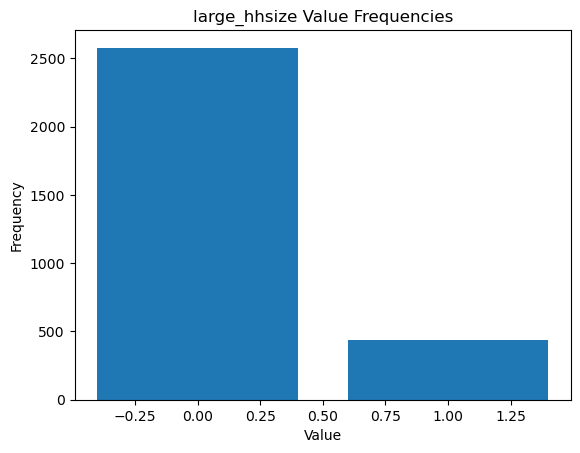

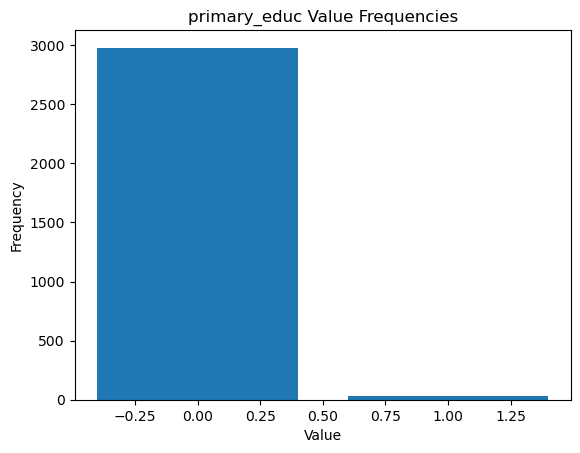

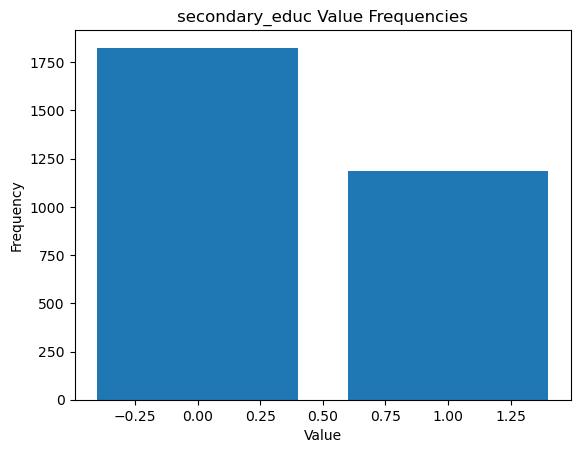

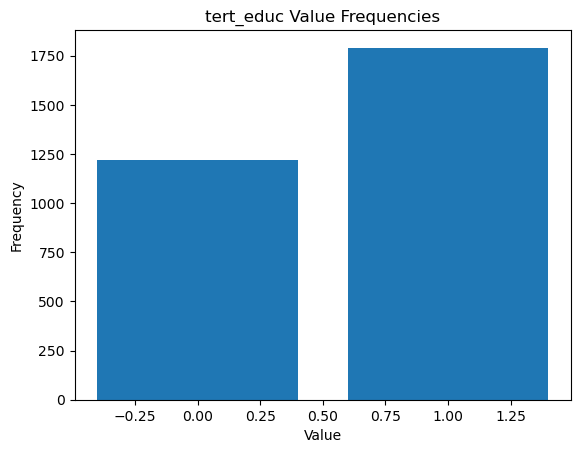

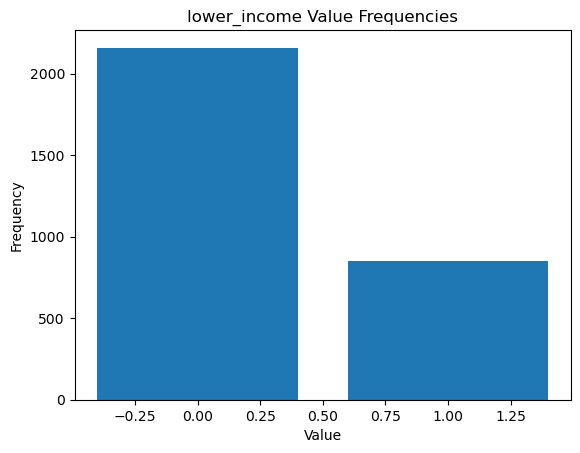

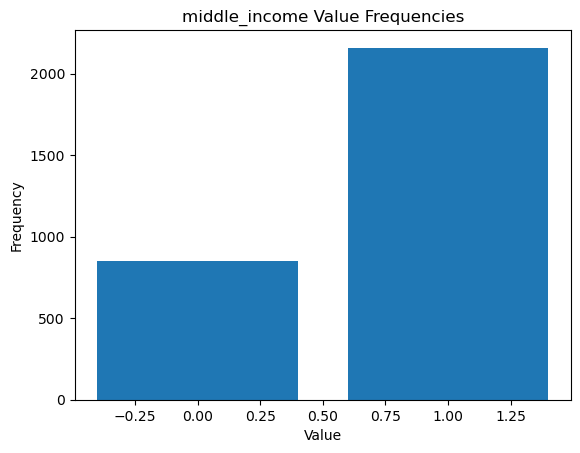

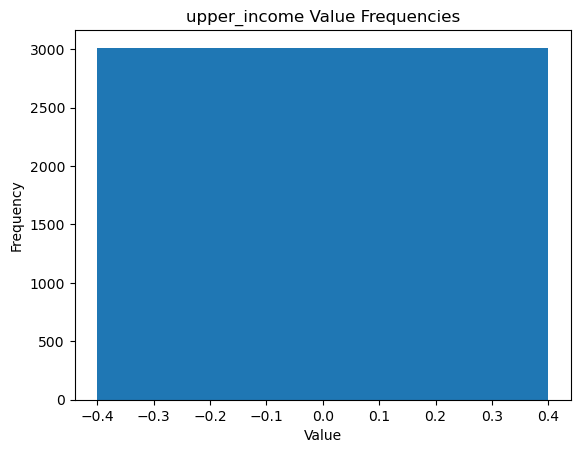

In [44]:
for col in final_cols:
    value_counts = dfus_new[col].value_counts()
    plt.figure()
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f"{col} Value Frequencies")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

upper %tile has 0 as the only value, see warning message 

In [45]:
dfus_new

,TEA18,suskill,knowent,opport,fearfail,gender,discent,busang,ESTBBUSO,easystart,...,old,small_hhsize,normal_hhsize,large_hhsize,primary_educ,secondary_educ,tert_educ,lower_income,middle_income,upper_income
0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,False,1,0,0,0,1,0,0,1,0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,False,0,1,0,0,1,0,0,1,0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,False,1,0,0,0,0,1,1,0,0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,0,1,0,0,0,1,0,1,0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,1,0,0,0,0,1,0,1,0
3008,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,False,0,1,0,0,0,1,0,1,0
3009,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,False,0,1,0,0,0,1,0,1,0
3010,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,False,1,0,0,0,0,1,0,1,0


## MODEL

In [46]:
data = pd.DataFrame(dfus_new)

In [47]:
def hot_encode1(P):  
    if(P<= 0):  
        return 0  
    if(P>= 1):  
        return 1  

In [48]:
data_encoded = data.applymap(hot_encode1)

In [49]:
temp_cols=data_encoded.columns.tolist()
new_cols=temp_cols[1:] + temp_cols[0:1]
data_encoded=data_encoded[new_cols]
print(data_encoded)

      suskill  knowent  opport  fearfail  gender  discent  busang  ESTBBUSO   
0           1        1       1         0       1        0       0         0  \
1           0        0       1         1       1        0       0         0   
2           0        0       0         1       1        0       0         0   
3           1        1       0         0       1        0       0         0   
4           1        0       1         0       1        0       0         0   
...       ...      ...     ...       ...     ...      ...     ...       ...   
3007        1        1       1         0       0        0       0         1   
3008        1        0       1         1       1        0       0         0   
3009        1        1       0         0       1        0       1         0   
3010        1        1       1         0       1        1       0         0   
3011        0        0       0         1       1        0       0         0   

      easystart  nbstatus  ...  small_hhsize  norma

In [50]:
data_encoded.info

<bound method DataFrame.info of       suskill  knowent  opport  fearfail  gender  discent  busang  ESTBBUSO   
0           1        1       1         0       1        0       0         0  \
1           0        0       1         1       1        0       0         0   
2           0        0       0         1       1        0       0         0   
3           1        1       0         0       1        0       0         0   
4           1        0       1         0       1        0       0         0   
...       ...      ...     ...       ...     ...      ...     ...       ...   
3007        1        1       1         0       0        0       0         1   
3008        1        0       1         1       1        0       0         0   
3009        1        1       0         0       1        0       1         0   
3010        1        1       1         0       1        1       0         0   
3011        0        0       0         1       1        0       0         0   

      easystart  nb

In [53]:
frq_items = apriori(data_encoded, min_support = 0.05, use_colnames = True)  
rules = association_rules(frq_items, metric = "lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

C:\Users\rishi\AppData\Roaming\Python\Python38\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [54]:

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17033,"(TEA18, nbmedia, opport, gender)",(suskill),0.055445,0.589973,0.053121,0.958084,1.623944,0.020410,9.782062
13255,"(TEA18, knowent, opport, gender)",(suskill),0.054449,0.589973,0.052125,0.957317,1.622644,0.020001,9.606337
2876,"(TEA18, knowent, gender)",(suskill),0.060425,0.589973,0.057437,0.950549,1.611173,0.021788,8.291648
15723,"(tert_educ, TEA18, knowent, nbstatus)",(suskill),0.055445,0.589973,0.052457,0.946108,1.603645,0.019746,7.608271
15953,"(tert_educ, TEA18, nbmedia, knowent)",(suskill),0.054449,0.589973,0.051461,0.945122,1.601974,0.019337,7.471595
...,...,...,...,...,...,...,...,...,...
16219,(nbstatus),"(fearfail, easystart, suskill, opport)",0.796813,0.060425,0.050133,0.062917,1.041236,0.001985,1.002659
11237,(nbstatus),"(large_hhsize, middle_income, gender)",0.796813,0.061421,0.050133,0.062917,1.024351,0.001192,1.001596
12463,(nbstatus),"(secondary_educ, lower_income, young)",0.796813,0.061753,0.050133,0.062917,1.018844,0.000927,1.001242
25143,(nbstatus),"(tert_educ, easystart, knowent, gender)",0.796813,0.062417,0.050133,0.062917,1.008005,0.000398,1.000533


In [57]:
rules1 = rules[rules['consequents'] == frozenset({'TEA18'})]
rules1.reset_index(drop=True, inplace=True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(tert_educ, suskill, knowent, opport)",(TEA18),0.155046,0.144422,0.059097,0.381156,2.639179,0.036705,1.382542
1,"(opport, tert_educ, suskill, middle_income, kn...",(TEA18),0.132802,0.144422,0.050465,0.380000,2.631172,0.031285,1.379964
2,"(tert_educ, suskill, knowent, nbmedia)",(TEA18),0.136122,0.144422,0.051461,0.378049,2.617662,0.031802,1.375635
3,"(nbmedia, suskill, knowent, opport)",(TEA18),0.180279,0.144422,0.067397,0.373849,2.588582,0.041361,1.366408
4,"(suskill, knowent, opport, gender)",(TEA18),0.139774,0.144422,0.052125,0.372922,2.582161,0.031938,1.364387
...,...,...,...,...,...,...,...,...,...
151,(nbmedia),(TEA18),0.763612,0.144422,0.111554,0.146087,1.011526,0.001271,1.001949
152,"(nbmedia, middle_income)",(TEA18),0.548141,0.144422,0.080013,0.145972,1.010731,0.000850,1.001815
153,(nbstatus),(TEA18),0.796813,0.144422,0.116202,0.145833,1.009770,0.001124,1.001652
154,"(nbmedia, middle_income, nbstatus)",(TEA18),0.457835,0.144422,0.066401,0.145033,1.004226,0.000279,1.000714


In [58]:
final_rules = pd.DataFrame(columns=['antecedents','consequents','antecedent support','consequent support','support','confidence','lift','leverage','conviction'])

In [59]:
for i in range(0,len(rules1)):
    final_rules.loc[len(final_rules.index)] = [ list(rules1['antecedents'][i]) , list(rules1['consequents'][i]), rules1['antecedent support'][i], rules1['consequent support'][i],rules1['support'][i],rules1['confidence'][i],rules1['lift'][i],rules1['leverage'][i],rules1['conviction'][i]]

In [60]:
final_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"[tert_educ, suskill, knowent, opport]",[TEA18],0.155046,0.144422,0.059097,0.381156,2.639179,0.036705,1.382542
1,"[opport, tert_educ, suskill, middle_income, kn...",[TEA18],0.132802,0.144422,0.050465,0.380000,2.631172,0.031285,1.379964
2,"[tert_educ, suskill, knowent, nbmedia]",[TEA18],0.136122,0.144422,0.051461,0.378049,2.617662,0.031802,1.375635
3,"[nbmedia, suskill, knowent, opport]",[TEA18],0.180279,0.144422,0.067397,0.373849,2.588582,0.041361,1.366408
4,"[suskill, knowent, opport, gender]",[TEA18],0.139774,0.144422,0.052125,0.372922,2.582161,0.031938,1.364387
...,...,...,...,...,...,...,...,...,...
151,[nbmedia],[TEA18],0.763612,0.144422,0.111554,0.146087,1.011526,0.001271,1.001949
152,"[nbmedia, middle_income]",[TEA18],0.548141,0.144422,0.080013,0.145972,1.010731,0.000850,1.001815
153,[nbstatus],[TEA18],0.796813,0.144422,0.116202,0.145833,1.009770,0.001124,1.001652
154,"[nbmedia, middle_income, nbstatus]",[TEA18],0.457835,0.144422,0.066401,0.145033,1.004226,0.000279,1.000714
